## **Fast Ferry Business Case**

### **Current Situation**
* Amrun roster changes have led to increased losses due to fleet parking during Crew Change over days
* Current fleet parking duration averages over 2 hours during shift transitions
* Fleet parking affects critical mining equipment including haul trucks, excavators, and support vehicles
* Current roster system splits crews into A/B teams, increasing transition complexity
  
* Travel time:
    * Original crossing time: 30 minutes
    * Fast ferry crossing time: 15 minutes
    * Time saved per direction: 15 minutes
* Despite faster transit times, commuter schedules have been adjusted forward by 15 minutes when fast ferry was in operation



### **Opportunity Analysis**

**Proposed Long-Term Solution**:
* Permanently maintain the fast ferry service
* Revert employee start/end times to original schedule (slow ferry timing)
* Benefits:
    * Generates an additional 30 minutes of productive work time on shift swap days
    * Maximizes the advantage of reduced crossing times
    * Potential to minimise fleet parking losses during shift changes
  
### **Potential Alternatives**

### Option 1: Modify Crew Change Times  
* Adjust shift changeover schedules to optimise ferry usage and minimise operational downtime
* This approach maintains current accommodation arrangements while focusing on schedule optimisation
* Reduce fleet parking duration during shift transitions

### Option 2: Return to Previous Accommodation Model and 4 Crews
* **Dayshift Crews**: 
    * Travel to camp the night before their shift begins
    * Replicates the successful arrangement from the previous lifestyle roster
* **Nightshift Crews**:
    * Travel to site in the morning before their shift
    * Allows for more flexible ferry scheduling and reduced congestion
* Benefits:
    * Reduces morning and evening ferry congestion
    * Provides more consistent workforce availability
    *  Reduce fleet parking duration during shift transitions


 **Additional Info*

**Roster Structure**
* Amrun operates on a 7/7 roster system
* All 4 crews are divided into Crew A and Crew B
* Each crew has a staggered start, offset by one day

**Crew Change Schedule**

Tuesday
* Afternoon: Crew change Boat Out

Wednesday
* Morning:
    * Crew change Boat Out
    * Crew change Boat In
* Afternoon:
    * Crew change Boat Out
    * Crew change Boat In

Thursday
* Morning:
    * Crew change Boat Out
    * Crew change Boat In
* Afternoon:
    * Crew change Boat In

**Timeline* As per original rollout 

Dayshift – First Day
* **Departure**: Humbug at 5:30 AM
* **HRT Arrival**: 6:15 AM
* **Camp Stop**: 20-minute break to get crib
* **Site Arrival**: 7:15 AM
* **Shift Details**: Start at 7:25 AM, on HME by 8:00 AM

Dayshift – Last Day
* **Equipment**: Pull up HME/swapped out prior to 5:30 PM
* **Departure**: Site at 5:30 PM

Nightshift – First Day
* **Departure**: Humbug at 5:30 PM
* **HRT Arrival**: 6:15 PM
* **Camp Stop**: 20-minute break to get crib
* **Site Arrival**: 7:15 PM
* **Shift Details**: Start at 7:25 PM, on HME by 8:00 PM

Nightshift – Last Day
* **Equipment**: Pull up HME/swapped out prior to 5:30 AM
* **Departure**: Site at 5:30 AM

### Additional Notes
* Crews will operate at 50% manning each week due to the new roster and split Crews (A & B Teams), resulting in approximately 12 hours of reduced staffing (as per original plan)
##### 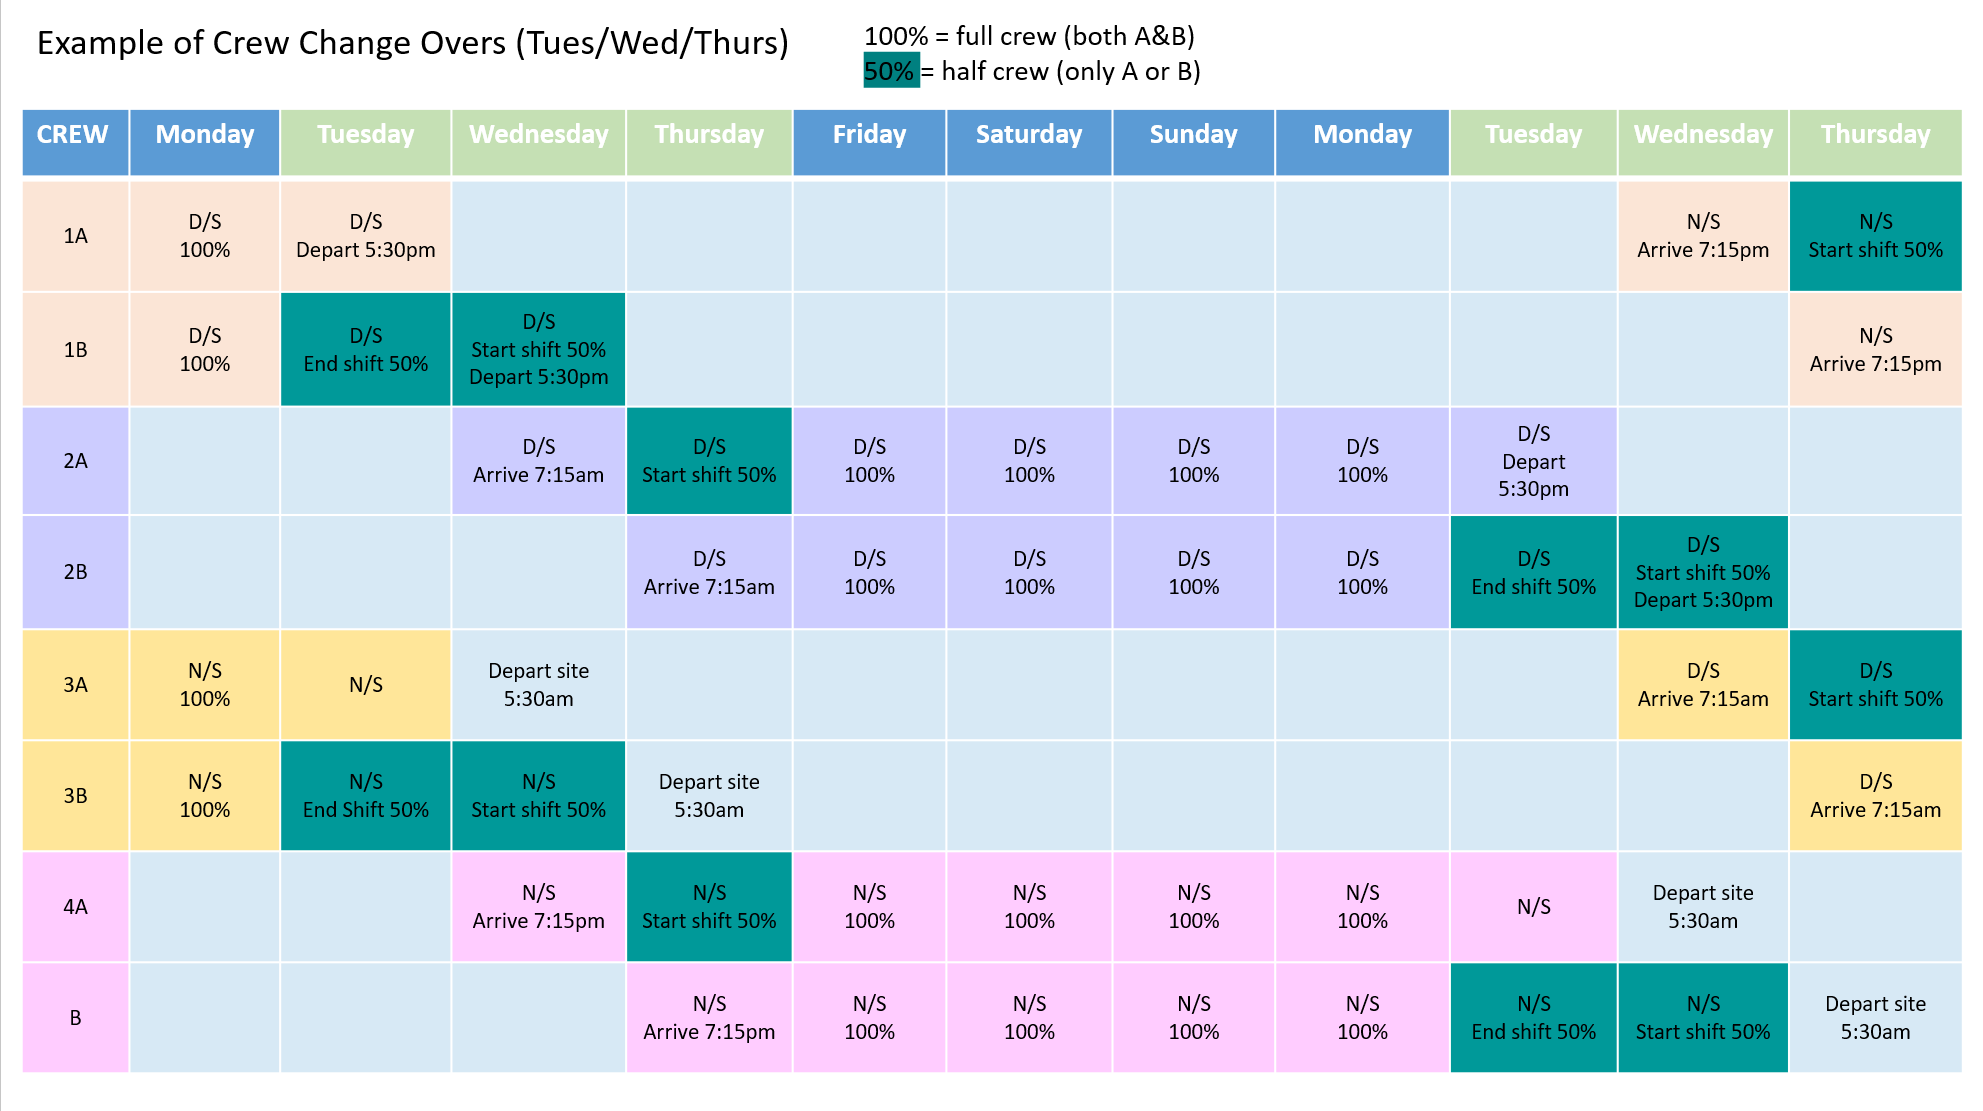

In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Data Loading Function
def load_and_prepare_data(filepath):
    """Load CSV and prepare datetime columns."""
    df = pd.read_csv(filepath)
    df['start_time'] = pd.to_datetime(df['start_time'])
    df['month'] = df['start_time'].dt.strftime('%Y-%m')
    return df

# Load the data
crew_df = load_and_prepare_data('../src/data/raw/crew_change_over_amrun.csv')
shift_df = load_and_prepare_data('../src/data/raw/shift_change_amrun.csv')

# Convert start_time to datetime
shift_df['start_time'] = pd.to_datetime(shift_df['start_time'])
crew_df['start_time'] = pd.to_datetime(crew_df['start_time'])

### Lost Hours Comparison 
Comparing 9-month periods before and after implementation

The blue line (before) shows the baseline of lost hours with just shift changes

The green line (after) shows the new reality with both shift and crew changes

The dotted lines show the average hours lost in each period

The percentage change indicator reveals the quantitative impact of the new system

Key Insight: The trend lines and monthly comparisons show not just the absolute change in lost hours, but also the stability/variability of the new system

In [3]:
def analyze_lost_hours(crew_df, shift_df, cutoff_date='2024-03-20', months_to_compare=9):
    """
    Analyze and visualize lost hours before and after implementation.
    
    Args:
        crew_df: DataFrame with crew change data
        shift_df: DataFrame with shift change data
        cutoff_date: Implementation date for comparison
        months_to_compare: Number of months to include in comparison
    """
    # Get data before cutoff
    shift_before = shift_df[shift_df['start_time'] < cutoff_date].copy()
    shift_before['month_name'] = shift_before['start_time'].dt.strftime('%B')
    shift_before['hours'] = shift_before['total_combined_minutes'] / 60

    # Get data after cutoff
    shift_after = shift_df[shift_df['start_time'] >= cutoff_date].copy()
    crew_after = crew_df[crew_df['start_time'] >= cutoff_date].copy()
    
    # Convert minutes to hours
    shift_after['hours'] = shift_after['total_combined_minutes'] / 60
    crew_after['hours'] = crew_after['total_combined_minutes'] / 60

    # Process before-cutoff data
    shift_monthly_before = shift_before.groupby('month_name')['hours'].sum()

    # Process after-cutoff data
    shift_after['month_name'] = shift_after['start_time'].dt.strftime('%B')
    crew_after['month_name'] = crew_after['start_time'].dt.strftime('%B')

    after_data = pd.DataFrame()
    after_data['hours'] = (
        shift_after.groupby('month_name')['hours'].sum() +
        crew_after.groupby('month_name')['hours'].sum()
    )

    # Get common months between periods
    common_months = sorted(
        list(set(shift_monthly_before.index) & set(after_data.index)),
        key=lambda x: pd.to_datetime(x, format='%B').month
    )[:months_to_compare]

    # Filter data for common months
    before_data = shift_monthly_before[common_months]
    after_data = after_data.loc[common_months]

    # Calculate averages
    before_avg = before_data.mean()
    after_avg = after_data['hours'].mean()

    # Create visualisation
    plt.figure(figsize=(15, 8))
    plt.title(f'Lost Hours Comparison - {months_to_compare} Month Periods Before and After Implementation', pad=20)

    x = range(len(common_months))
    plt.plot(x, before_data.values, marker='o', color='blue', 
             label=f'Before Implementation (Avg: {before_avg:.1f} hrs)')
    plt.plot(x, after_data['hours'].values, marker='o', color='green', 
             label=f'After Implementation (Avg: {after_avg:.1f} hrs)')

    # Add value labels
    for i, (v1, v2) in enumerate(zip(before_data.values, after_data['hours'].values)):
        plt.text(i, v1, f'{v1:.1f}', ha='center', va='bottom', color='blue')
        plt.text(i, v2, f'{v2:.1f}', ha='center', va='bottom', color='green')

    plt.xticks(x, common_months, rotation=45)
    plt.grid(True, alpha=0.3)
    plt.xlabel('Month')
    plt.ylabel('Total Lost Hours')

    # Add average lines
    plt.axhline(y=before_avg, color='blue', linestyle='--', alpha=0.5)
    plt.axhline(y=after_avg, color='green', linestyle='--', alpha=0.5)

    # Calculate and display percentage change
    percent_change = ((after_avg - before_avg) / before_avg) * 100
    change_text = f'Change in Average: {percent_change:.1f}%'
    plt.text(0.02, 0.98, change_text, transform=plt.gca().transAxes, 
             bbox=dict(facecolor='white', alpha=0.8))

    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

    # Print detailed comparison
    print("\nMonthly Comparison:")
    print(f"{'Month':<12} {'Before':>12} {'After':>12} {'Difference':>12} {'% Change':>12}")
    print("-" * 60)
    for month in common_months:
        before_val = before_data[month]
        after_val = after_data.loc[month, 'hours']
        diff = after_val - before_val
        pct_change = (diff / before_val) * 100
        print(f"{month:<12} {before_val:>12.1f} {after_val:>12.1f} {diff:>12.1f} {pct_change:>11.1f}%")
        
    return before_data, after_data, before_avg, after_avg, percent_change

In [ ]:
# Execute Lost Hours Analysis
before_data, after_data, before_avg, after_avg, percent_change = analyze_lost_hours(crew_df, shift_df)

### Timeline Analysis 

This visualisation shows the dramatic shift in total minutes lost to changeovers before and after March 20, 2024

Before implementation: Operations were running with shift changes only, showing relatively consistent total minutes each month

After implementation: The combined impact of both shift and crew changes reveals an increase in total minutes lost

Key Insight: While the total minutes increased after implementation, this was expected as we're now tracking both types of changes. The important question is whether the operational benefits outweigh this increased time investment.

In [5]:
def plot_timeline_analysis(crew_df, shift_df, cutoff_date='2024-03-20'):
    """Plot timeline analysis before and after cutoff date."""
    cutoff = pd.Timestamp(cutoff_date)
    shift_before = shift_df[shift_df['start_time'] < cutoff]
    shift_monthly_before = shift_before.groupby('month')['total_combined_minutes'].sum()
    
    shift_after = shift_df[shift_df['start_time'] >= cutoff]
    crew_after = crew_df[crew_df['start_time'] >= cutoff]
    after_monthly = pd.DataFrame({
        'month': pd.concat([shift_after['month'], crew_after['month']]).unique()
    }).sort_values('month')
    
    after_monthly['total_minutes'] = after_monthly['month'].apply(lambda m: 
        shift_after[shift_after['month'] == m]['total_combined_minutes'].sum() +
        crew_after[crew_after['month'] == m]['total_combined_minutes'].sum())
    
    plt.figure(figsize=(15, 6))
    plt.title('Shift and Crew Change Delays: 9 Months Before vs 9 Months After Implementation- Minutes', pad=20)
    
    x_before = range(len(shift_monthly_before))
    x_after = range(len(shift_monthly_before), len(shift_monthly_before) + len(after_monthly))
    
    plt.plot(x_before, shift_monthly_before.values, marker='o', color='blue', label='Shift Change Only')
    plt.plot(x_after, after_monthly['total_minutes'], marker='o', color='green', label='Combined Changes')
    
    for i, v in enumerate(shift_monthly_before.values):
        plt.text(i, v, f'{int(v):,}', ha='center', va='bottom')
    for i, v in enumerate(after_monthly['total_minutes']):
        plt.text(i + len(shift_monthly_before), v, f'{int(v):,}', ha='center', va='bottom')
    
    all_months = list(shift_monthly_before.index) + list(after_monthly['month'])
    plt.xticks(range(len(all_months)), all_months, rotation=45)
    plt.axvline(x=len(shift_monthly_before)-0.5, color='red', linestyle='--', label='Crew Change Implemented')
    plt.xlabel('Month')
    plt.ylabel('Total Minutes')
    plt.legend()
    plt.tight_layout()
    plt.show()


In [ ]:
# Execute Timeline Analysis
plot_timeline_analysis(crew_df, shift_df)

### Timing Distribution Analysis
Understanding when changes occur throughout the day to identify operational patterns.

In [ ]:
# Extract hour and minute, convert to decimal hours for more granular binning
shift_df['time_decimal'] = shift_df['start_time'].dt.hour + shift_df['start_time'].dt.minute/60
crew_df['time_decimal'] = crew_df['start_time'].dt.hour + crew_df['start_time'].dt.minute/60

# Create formatted time strings for better display
def format_time(x):
    hours = int(x)
    minutes = int((x % 1) * 60)
    return f"{hours:02d}:{minutes:02d}"

# Create two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

# Shift Changes Plot - using smaller bins (15-minute intervals)
bins = np.linspace(0, 24, 96)  # 96 bins for 15-minute intervals
sns.histplot(data=shift_df, x='time_decimal', bins=bins, ax=ax1, 
            color='lightblue', kde=True, stat='count')
ax1.set_title('Distribution of Shift Change Start Times (15-Minute Intervals)', pad=15, fontsize=12)
ax1.set_xlabel('Time of Day')
ax1.set_ylabel('Number of Changes')
ax1.grid(True, alpha=0.3)

# Crew Changes Plot
sns.histplot(data=crew_df, x='time_decimal', bins=bins, ax=ax2,
            color='lightcoral', kde=True, stat='count')
ax2.set_title('Distribution of Crew Change Start Times (15-Minute Intervals)', pad=15, fontsize=12)
ax2.set_xlabel('Time of Day')
ax2.set_ylabel('Number of Changes')
ax2.grid(True, alpha=0.3)

# Set x-axis limits and ticks for both plots with more detailed time labels
for ax in [ax1, ax2]:
    ax.set_xlim(0, 23.99)
    # Create time labels every hour
    major_ticks = np.arange(0, 24, 1)
    minor_ticks = np.arange(0, 24, 0.25)  # 15-minute intervals
    ax.set_xticks(major_ticks)
    ax.set_xticks(minor_ticks, minor=True)
    
    # Format major tick labels (hours)
    major_labels = [f'{int(i):02d}:00' for i in major_ticks]
    ax.set_xticklabels(major_labels, rotation=45)
    
    # Add grid for 15-minute intervals
    ax.grid(True, which='major', alpha=0.3)
    ax.grid(True, which='minor', alpha=0.1)

plt.tight_layout()
plt.show()


In [8]:
# Group into 15-minute intervals
shift_df['time_interval'] = shift_df['time_decimal'].apply(lambda x: format_time(x))
crew_df['time_interval'] = crew_df['time_decimal'].apply(lambda x: format_time(x))

# Get counts and sort by time
shift_counts = shift_df['time_interval'].value_counts().sort_index()
crew_counts = crew_df['time_interval'].value_counts().sort_index()

### Day Shift vs Night Shift Comparison 


This chart breaks down the impact between day and night shifts, revealing distinct patterns after Crew Change was implemented 

Before implementation: There was a relatively balanced distribution between day and night shift changes

After implementation: We can see that Day Shift delays are higher than Night Shift 

Key Insight: This comparison helps identify if there are shift-specific challenges or efficiencies that could be applied across both periods. Eg Parkup and Ferry Times 

In [9]:
def plot_day_night_comparison(crew_df, shift_df, cutoff_date='2024-03-20'):
    """Plot day vs night shift comparison."""
    cutoff = pd.Timestamp(cutoff_date)
    shift_before = shift_df[shift_df['start_time'] < cutoff]
    
    def get_shift_totals(df, shift_num):
        return df[df['shift'] == shift_num].groupby('month')['total_combined_minutes'].sum()
    
    shift_day_before = get_shift_totals(shift_before, 1)
    shift_night_before = get_shift_totals(shift_before, 2)
    
    shift_after = shift_df[shift_df['start_time'] >= cutoff]
    crew_after = crew_df[crew_df['start_time'] >= cutoff]
    after_months = sorted(pd.concat([shift_after['month'], crew_after['month']]).unique())
    
    def calculate_after_totals(month, shift_num):
        shift_total = shift_after[(shift_after['month'] == month) & 
                                (shift_after['shift'] == shift_num)]['total_combined_minutes'].sum()
        crew_total = crew_after[(crew_after['month'] == month) & 
                               (crew_after['shift'] == shift_num)]['total_combined_minutes'].sum()
        return shift_total + crew_total
    
    day_after = {m: calculate_after_totals(m, 1) for m in after_months}
    night_after = {m: calculate_after_totals(m, 2) for m in after_months}
    
    plt.figure(figsize=(15, 8))
    plt.title('Monthly Day Shift vs Night Shift Comparison\nBefore and After Crew Change Implementation', pad=20)
    
    x = np.arange(len(shift_day_before) + len(after_months))
    width = 0.35
    
    def plot_bars_with_labels(x_pos, values, offset, color):
        plt.bar(x_pos + offset, values, width, color=color)
        for i, v in enumerate(values):
            plt.text(x_pos[i] + offset, v, f'{int(v):,}', ha='center', va='bottom', rotation=90)

    plot_bars_with_labels(np.arange(len(shift_day_before)), shift_day_before.values, -width/2, 'lightblue')
    plot_bars_with_labels(np.arange(len(shift_night_before)), shift_night_before.values, width/2, 'navy')

    day_values = [day_after[m] for m in after_months]
    night_values = [night_after[m] for m in after_months]
    plot_bars_with_labels(np.arange(len(shift_day_before), x.size), day_values, -width/2, 'lightblue')
    plot_bars_with_labels(np.arange(len(shift_night_before), x.size), night_values, width/2, 'navy')

    all_months = list(shift_day_before.index) + list(after_months)
    plt.xticks(x, all_months, rotation=45)
    plt.axvline(x=len(shift_day_before)-0.5, color='red', linestyle='--', label='Crew Change Implemented')
    plt.xlabel('Month')
    plt.ylabel('Total Minutes')
    plt.legend(['Crew Change Implemented', 'Day Shift', 'Night Shift'])
    plt.tight_layout()
    plt.show()

In [ ]:
# Execute Day/Night Comparison
plot_day_night_comparison(crew_df, shift_df)

### Average Delay Times- Monthly Trends

Day vs Night Variations: By comparing the light and dark blue bars, we can immediately spot if one shift consistently takes longer than the other
This could reveal important operational differences between day and night operations, such as:

-Staffing levels affecting handover time

-Different operational challenges unique to each shift

-Varying levels of activity or workload between shifts

### The month-by-month progression shows if there are:

-Seasonal patterns in shift duration

-Gradual improvements or deteriorations over time

-Specific months with unusual patterns that might need investigation

*Note- The first month of Crew Change implementation was significantly higher for minutes in a delay at the start due to the roster change for the first week of each crew 

In [11]:
def plot_averages(df, title):
    """Plot average minutes per shift by month."""
    monthly_avg = df.groupby(['month', 'shift'])['total_combined_minutes'].mean().reset_index()
    
    plt.figure(figsize=(15, 6))
    plt.title(title, pad=20, fontsize=14)
    
    x = np.arange(len(monthly_avg['month'].unique()))
    width = 0.35
    
    for shift_num, shift_name, offset in [(1, 'Day Shift', -width/2), (2, 'Night Shift', width/2)]:
        shift_data = monthly_avg[monthly_avg['shift'] == shift_num]['total_combined_minutes']
        plt.bar(x + offset, shift_data, width, label=shift_name, 
                color='lightblue' if shift_num == 1 else 'navy')
        for i, v in enumerate(shift_data):
            plt.text(i + offset, v, f'{int(v)}', ha='center', va='bottom')
    
    plt.grid(True, linestyle='--', alpha=0.7, axis='y')
    plt.xlabel('Month', fontsize=12)
    plt.ylabel('Average Minutes', fontsize=12)
    plt.xticks(x, monthly_avg['month'].unique(), rotation=45)
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.show()

In [ ]:
# Execute Average Minutes Plots
plot_averages(shift_df, 'Average Minutes per Shift Change by Month')
plot_averages(crew_df, 'Average Minutes per Crew Change by Month')

In [13]:
def plot_total_hours_comparison(crew_df, shift_df):
    """Plot total hours comparison between shift and crew changes."""
    def calculate_monthly_hours(df):
        monthly = df.groupby('month')['total_combined_minutes'].sum().reset_index()
        monthly['hours'] = monthly['total_combined_minutes'] / 60
        return monthly
    
    crew_monthly = calculate_monthly_hours(crew_df)
    shift_monthly = calculate_monthly_hours(shift_df)
    
    common_months = sorted(list(set(crew_monthly['month']) & set(shift_monthly['month'])))
    crew_monthly = crew_monthly[crew_monthly['month'].isin(common_months)]
    shift_monthly = shift_monthly[shift_monthly['month'].isin(common_months)]
    
    plt.figure(figsize=(15, 6))
    plt.title('Total Hours: Shift Change vs Crew Change by Month', pad=20, fontsize=14)
    
    x = np.arange(len(common_months))
    width = 0.35
    
    for i, (data, label, offset) in enumerate([(shift_monthly, 'Shift Change', -width/2), 
                                             (crew_monthly, 'Crew Change', width/2)]):
        plt.bar(x + offset, data['hours'], width, label=label, 
                color='lightblue' if i == 0 else 'navy')
        for j, v in enumerate(data['hours']):
            plt.text(j + offset, v, f'{int(v):,}', ha='center', va='bottom')
    
    plt.grid(True, linestyle='--', alpha=0.7, axis='y')
    plt.xlabel('Month', fontsize=12)
    plt.ylabel('Total Hours', fontsize=12)
    plt.xticks(x, common_months, rotation=45)
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.show()

In [ ]:
# Execute Total Hours Comparison
plot_total_hours_comparison(crew_df, shift_df)

### Comparing Shift Changes vs. Crew Changes 
This visualisation provides a fundamental comparison between two critical operational processes: Shift Changes and Crew Change Over. 

The average Crew Change delay is 136.5 minutes vs Shift Change being 23.6 minutes. 
The reason for the significant difference is that on a Crew Change Over shift, the trucks are required to park up by 5:00 for the bus to leave site at 5.30am/pm 

In [15]:
def plot_summary_statistics(crew_df, shift_df):
    """Plot summary statistics comparing average durations."""
    avg_shift = shift_df['total_combined_minutes'].mean()
    avg_crew = crew_df['total_combined_minutes'].mean()
    
    plt.figure(figsize=(15, 6))
    plt.title("Summary Statistics", fontsize=22)
    
    summary_data = [avg_shift, avg_crew]
    labels = ['Average Shift\nChange Duration', 'Average Crew\nChange Duration']
    plt.bar(labels, summary_data, color=['orange', 'navy'])
    
    for i, v in enumerate(summary_data):
        plt.text(i, v, f'{v:.1f} min', ha='center', va='bottom', fontsize=12)
    
    plt.ylabel('Minutes', fontsize=12)
    plt.xticks(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

In [ ]:
# Execute Summary Statistics
plot_summary_statistics(crew_df, shift_df)

### Monthly Distribution Analysis

This visualisation shows the distribution of change durations across months using boxplots:
- The boxes show the interquartile range (IQR) containing 50% of the data
- The horizontal line in each box represents the median duration
- The whiskers extend to show the full range, excluding outliers
- Individual points beyond the whiskers represent outlier events
- The trend across months helps identify any seasonal patterns or systemic changes

Key observations to look for:
- Consistency of durations month-to-month
- Presence of extreme outliers
- Any seasonal patterns or trends
- Impact of operational changes on durations

In [17]:
def plot_monthly_distributions(shift_df):
    """
    Create boxplot showing monthly distribution of change durations with outliers.
    Latest months shown on the right.
    """
    # Convert month strings to datetime for proper sorting
    month_order = pd.to_datetime(shift_df['month'], format='%Y-%m').sort_values().dt.strftime('%Y-%m').unique()
    
    # Set up the figure
    plt.figure(figsize=(15, 8))

    # Create boxplot with outliers, using the sorted month order
    sns.boxplot(data=shift_df, 
                x='month', 
                y='total_combined_minutes',
                color='lightblue', 
                showfliers=True,
                order=month_order)

    # Customise plot appearance
    plt.title('Monthly Distribution of Change Durations with Outliers', pad=15)
    plt.xlabel('Month')
    plt.ylabel('Duration (minutes)')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()

In [ ]:
# Display the plot
plot_monthly_distributions(shift_df)
plt.show()

### Normalised Average Analysis

These visualisations compare day shift vs night shift durations:
- Values are normalised to account for different numbers of changes per month
- Day shifts (light blue) and night shifts (navy) are shown side by side
- Numbers above bars show exact average durations in minutes
- The legend includes the average number of changes per month for context

Key insights:
- Relative efficiency between day and night shift changes
- Month-to-month variation in average durations
- Impact of operational changes on both shifts
- Identification of which shift typically has longer durations

This analysis helps identify:
1. Whether certain shifts consistently take longer
2. If recent changes have improved efficiency
3. Opportunities for optimisation in specific shifts
4. The overall trend in change durations

In [ ]:
def plot_normalized_averages(df, title):
    """Plot normalised average minutes per shift by month."""
    # Group by month and shift, calculate normalised averages
    monthly_stats = df.groupby(['month', 'shift']).agg({
        'total_combined_minutes': ['mean', 'count']
    }).reset_index()
    
    # Rename columns for clarity
    monthly_stats.columns = ['month', 'shift', 'avg_minutes', 'num_changes']
    
    plt.figure(figsize=(15, 6))
    plt.title(title, pad=20, fontsize=14)
    
    x = np.arange(len(monthly_stats['month'].unique()))
    width = 0.35
    
    for shift_num, shift_name, offset in [(1, 'Day Shift', -width/2), (2, 'Night Shift', width/2)]:
        shift_data = monthly_stats[monthly_stats['shift'] == shift_num]
        
        # Plot the normalised averages
        plt.bar(x + offset, shift_data['avg_minutes'], width, 
                label=f'{shift_name} (avg of {shift_data["num_changes"].mean():.1f} changes/month)',
                color='lightblue' if shift_num == 1 else 'navy')
        
        # Add value labels
        for i, v in enumerate(shift_data['avg_minutes']):
            plt.text(i + offset, v, f'{int(v)}', ha='center', va='bottom')
    
    plt.grid(True, linestyle='--', alpha=0.7, axis='y')
    plt.xlabel('Month', fontsize=12)
    plt.ylabel('Average Minutes per Change', fontsize=12)
    plt.xticks(x, monthly_stats['month'].unique(), rotation=45)
    plt.legend(fontsize=10)
    plt.tight_layout()
    plt.show()

# Execute normalised plots
plot_normalized_averages(shift_df, 'Normalised Average Minutes per Shift Change by Month')
plot_normalized_averages(crew_df, 'Normalised Average Minutes per Crew Change by Month')


In [ ]:
def analyze_production_impact(before_data, after_data):
   """Analyses production and financial impact of lost hours."""
   def calculate_impact(hours):
       tmm = hours * 300  # TPH
       product_tonnes = tmm * 0.7 * 0.85 * 0.85  # Yield, moisture, rehandle
       return product_tonnes * 10  # Margin per tonne
   
   plt.figure(figsize=(15, 8))
   plt.title('Production Loss Analysis', pad=20)
   
   # Calculate impacts
   before_impact = before_data.apply(calculate_impact)
   after_impact = after_data['hours'].apply(calculate_impact)
   
   x_before = range(len(before_data))
   x_after = range(len(after_data))
   
   plt.plot(x_before, before_impact.values, marker='o', color='red',
            label=f'Before Implementation (Median: ${before_impact.median():,.0f})')
   plt.plot(x_after, after_impact.values, marker='o', color='green',
            label=f'After Implementation (Median: ${after_impact.median():,.0f})')
   
   # Add value labels
   for i, v1 in enumerate(before_impact.values):
       plt.text(i, v1, f'${v1:,.0f}', ha='center', va='bottom', color='red')
   
   for i, v2 in enumerate(after_impact.values):
       plt.text(i, v2, f'${v2:,.0f}', ha='center', va='bottom', color='green')
   
   plt.xticks(range(max(len(before_data), len(after_data))),
              before_data.index.tolist() + [''] * (max(len(before_data), len(after_data)) - len(before_data)),
              rotation=45)
   
   plt.grid(True, alpha=0.3)
   plt.xlabel('Month')
   plt.ylabel('Financial Impact ($)')
   
   plt.axhline(y=before_impact.median(), color='red', linestyle='--', alpha=0.5)
   plt.axhline(y=after_impact.median(), color='green', linestyle='--', alpha=0.5)
   
   total_before = before_impact.sum()
   total_after = after_impact.sum()
   percent_change = ((after_impact.median() - before_impact.median()) / before_impact.median()) * 100
   
   stats_text = (f'Total Before: ${total_before:,.0f}\n'
                f'Total After: ${total_after:,.0f}\n'
                f'Median Change: {percent_change:+.1f}%')
   
   plt.text(0.02, 0.98, stats_text, transform=plt.gca().transAxes,
            bbox=dict(facecolor='white', alpha=0.8), verticalalignment='top')
   
   plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
   plt.tight_layout()
   plt.show()
   
   return before_impact, after_impact, total_before, total_after, percent_change

# Run analysis
before_impact, after_impact, total_before, total_after, percent_change = \
   analyze_production_impact(before_data, after_data)

# Financial Impact Analysis of Crew Change Reduction

## Overview
Analysis of potential savings from implementing a 30-minute reduction in crew change times, comparing current operations versus optimised scenario.

## Charts Generated
- **Annual Lost Hours**: Bar chart comparing current vs reduced hours
- **Annual Financial Impact**: Bar chart showing monetary impact and potential savings

## Calculation Method
```python
# Hours calculation
Monthly reduction = 30 mins per delay

# Financial impact
TMM = Hours × 300 TPH
Product tonnes = TMM × 70% yield × 85% moisture × 85% rehandle
$ Impact = Product tonnes × $10/tonne
```

## Key Features
- Side-by-side comparison of hours and financial impact
- Clear savings visualization in both hours and dollars
- Annualized projection based on actual data
- Clean visual design without grid lines or unnecessary borders

## Usage
```python

hours_saved, financial_savings = analyze_annual_impact(crew_df)
```

In [ ]:
def analyze_annual_impact(crew_df):
    crew_df['reduced_minutes'] = crew_df['total_combined_minutes'] - 30
    
    total_hours = (crew_df['total_combined_minutes'].sum() / 60) * (12/9)
    reduced_hours = (crew_df['reduced_minutes'].sum() / 60) * (12/9)
    hours_saved = total_hours - reduced_hours
    
    def calculate_impact(hours):
        tmm = hours * 300
        product_tonnes = tmm * 0.7 * 0.85 * 0.85
        return product_tonnes * 10
    
    current_impact = calculate_impact(total_hours)
    reduced_impact = calculate_impact(reduced_hours)
    savings = current_impact - reduced_impact
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))
    fig.patch.set_facecolor('white')
    
    hours_data = [total_hours, reduced_hours]
    colors = ['#ff6b6b', '#51cf66']
    
    labels = ['Current', 'With Reduction'] 
    
    ax1.bar(labels, hours_data, color=colors, width=0.8)
    ax1.set_title('Annual Lost Hours\n(12-Month Estimate)', pad=21, size=18, color='black', fontweight='bold')
    ax1.set_ylabel('Hours', size=16, color='black', fontweight='bold')
    ax1.set_facecolor('white')
    
    for i, v in enumerate(hours_data):
        ax1.text(i, v/2, f'{int(v):,}', ha='center', va='center', 
                color='black', fontweight='bold', fontsize=16)
    
    ax1.text(0.75, 0.96, f'Hours Saved: {int(hours_saved):,}',
             ha='center', va='bottom', transform=ax1.transAxes,
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.6'),
             color='black', fontsize=17, fontweight='bold')
    
    impact_data = [current_impact, reduced_impact]
    
    ax2.bar(labels, impact_data, color=colors, width=0.8)
    ax2.set_title('Annual Financial Impact\n(12-Month Estimate)', pad=21, size=18, color='black', fontweight='bold')
    ax2.set_ylabel('Impact ($)', size=16, color='black', fontweight='bold')
    ax2.set_facecolor('white')
    
    for i, v in enumerate(impact_data):
        ax2.text(i, v/2, f'${int(v):,}', ha='center', va='center',
                color='black', fontweight='bold', fontsize=16)
    
    ax2.text(0.72, 0.96, f'Savings: ${int(savings):,}',
             ha='center', va='bottom', transform=ax2.transAxes,
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.6'),
             color='black', fontsize=17, fontweight='bold')
    
    ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))
    
    for ax in [ax1, ax2]:
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_color('black')
        ax.spines['left'].set_color('black')
        ax.tick_params(colors='black', labelsize=14)
        ax.grid(True, alpha=0.1)
    
    plt.tight_layout()
    plt.show()
    
    return hours_saved, savings

# Run analysis
hours_saved, financial_savings = analyze_annual_impact(crew_df)